# Exploring Google BigQuery 

### Introduction

Being new to Google BigQuery I decided to write a notebook documenting my learning process. I hope this will help other data analysts like me who are starting off in the field. 

### What is BigQuery?

BigQuery is a fully managed enterprise data warehouse that helps you manage and analyze your data with built-in features like machine learning, geospatial analysis, and business intelligence. BigQuery lets you use **SQL** queries to answer questions with zero infrastructure management. BigQuery's scalable, distributed analysis engine lets you query terabytes in seconds and petabytes in minutes.

### Getting Started with BigQuery commands

We will first import the Package package below:

In [1]:
from google.cloud import bigquery

We need to create a **CLIENT OBJECT** which will retrieve information from BigQuery datasets.

In [2]:
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


### Using Google BigQuery public datasets

Firstly, when signing up to Google BigQuery you will receive £300 free credit which is more then enough to learn and explore. 

Here is a [**guide**](https://www.optimizesmart.com/how-to-access-bigquery-public-data-sets/) showing how to find public datasets using Google BigQuery.

We will use the "Iowa Liquor Retail Sales" dataset which contains: Liquor Sales in Iowa since 2012, by store, by item, and by day.

To access the dataset we can use the **GET_DATASET()** method which requires the datasetID. The datasetID can be found when when viewing the dataset on Google BigQuery.

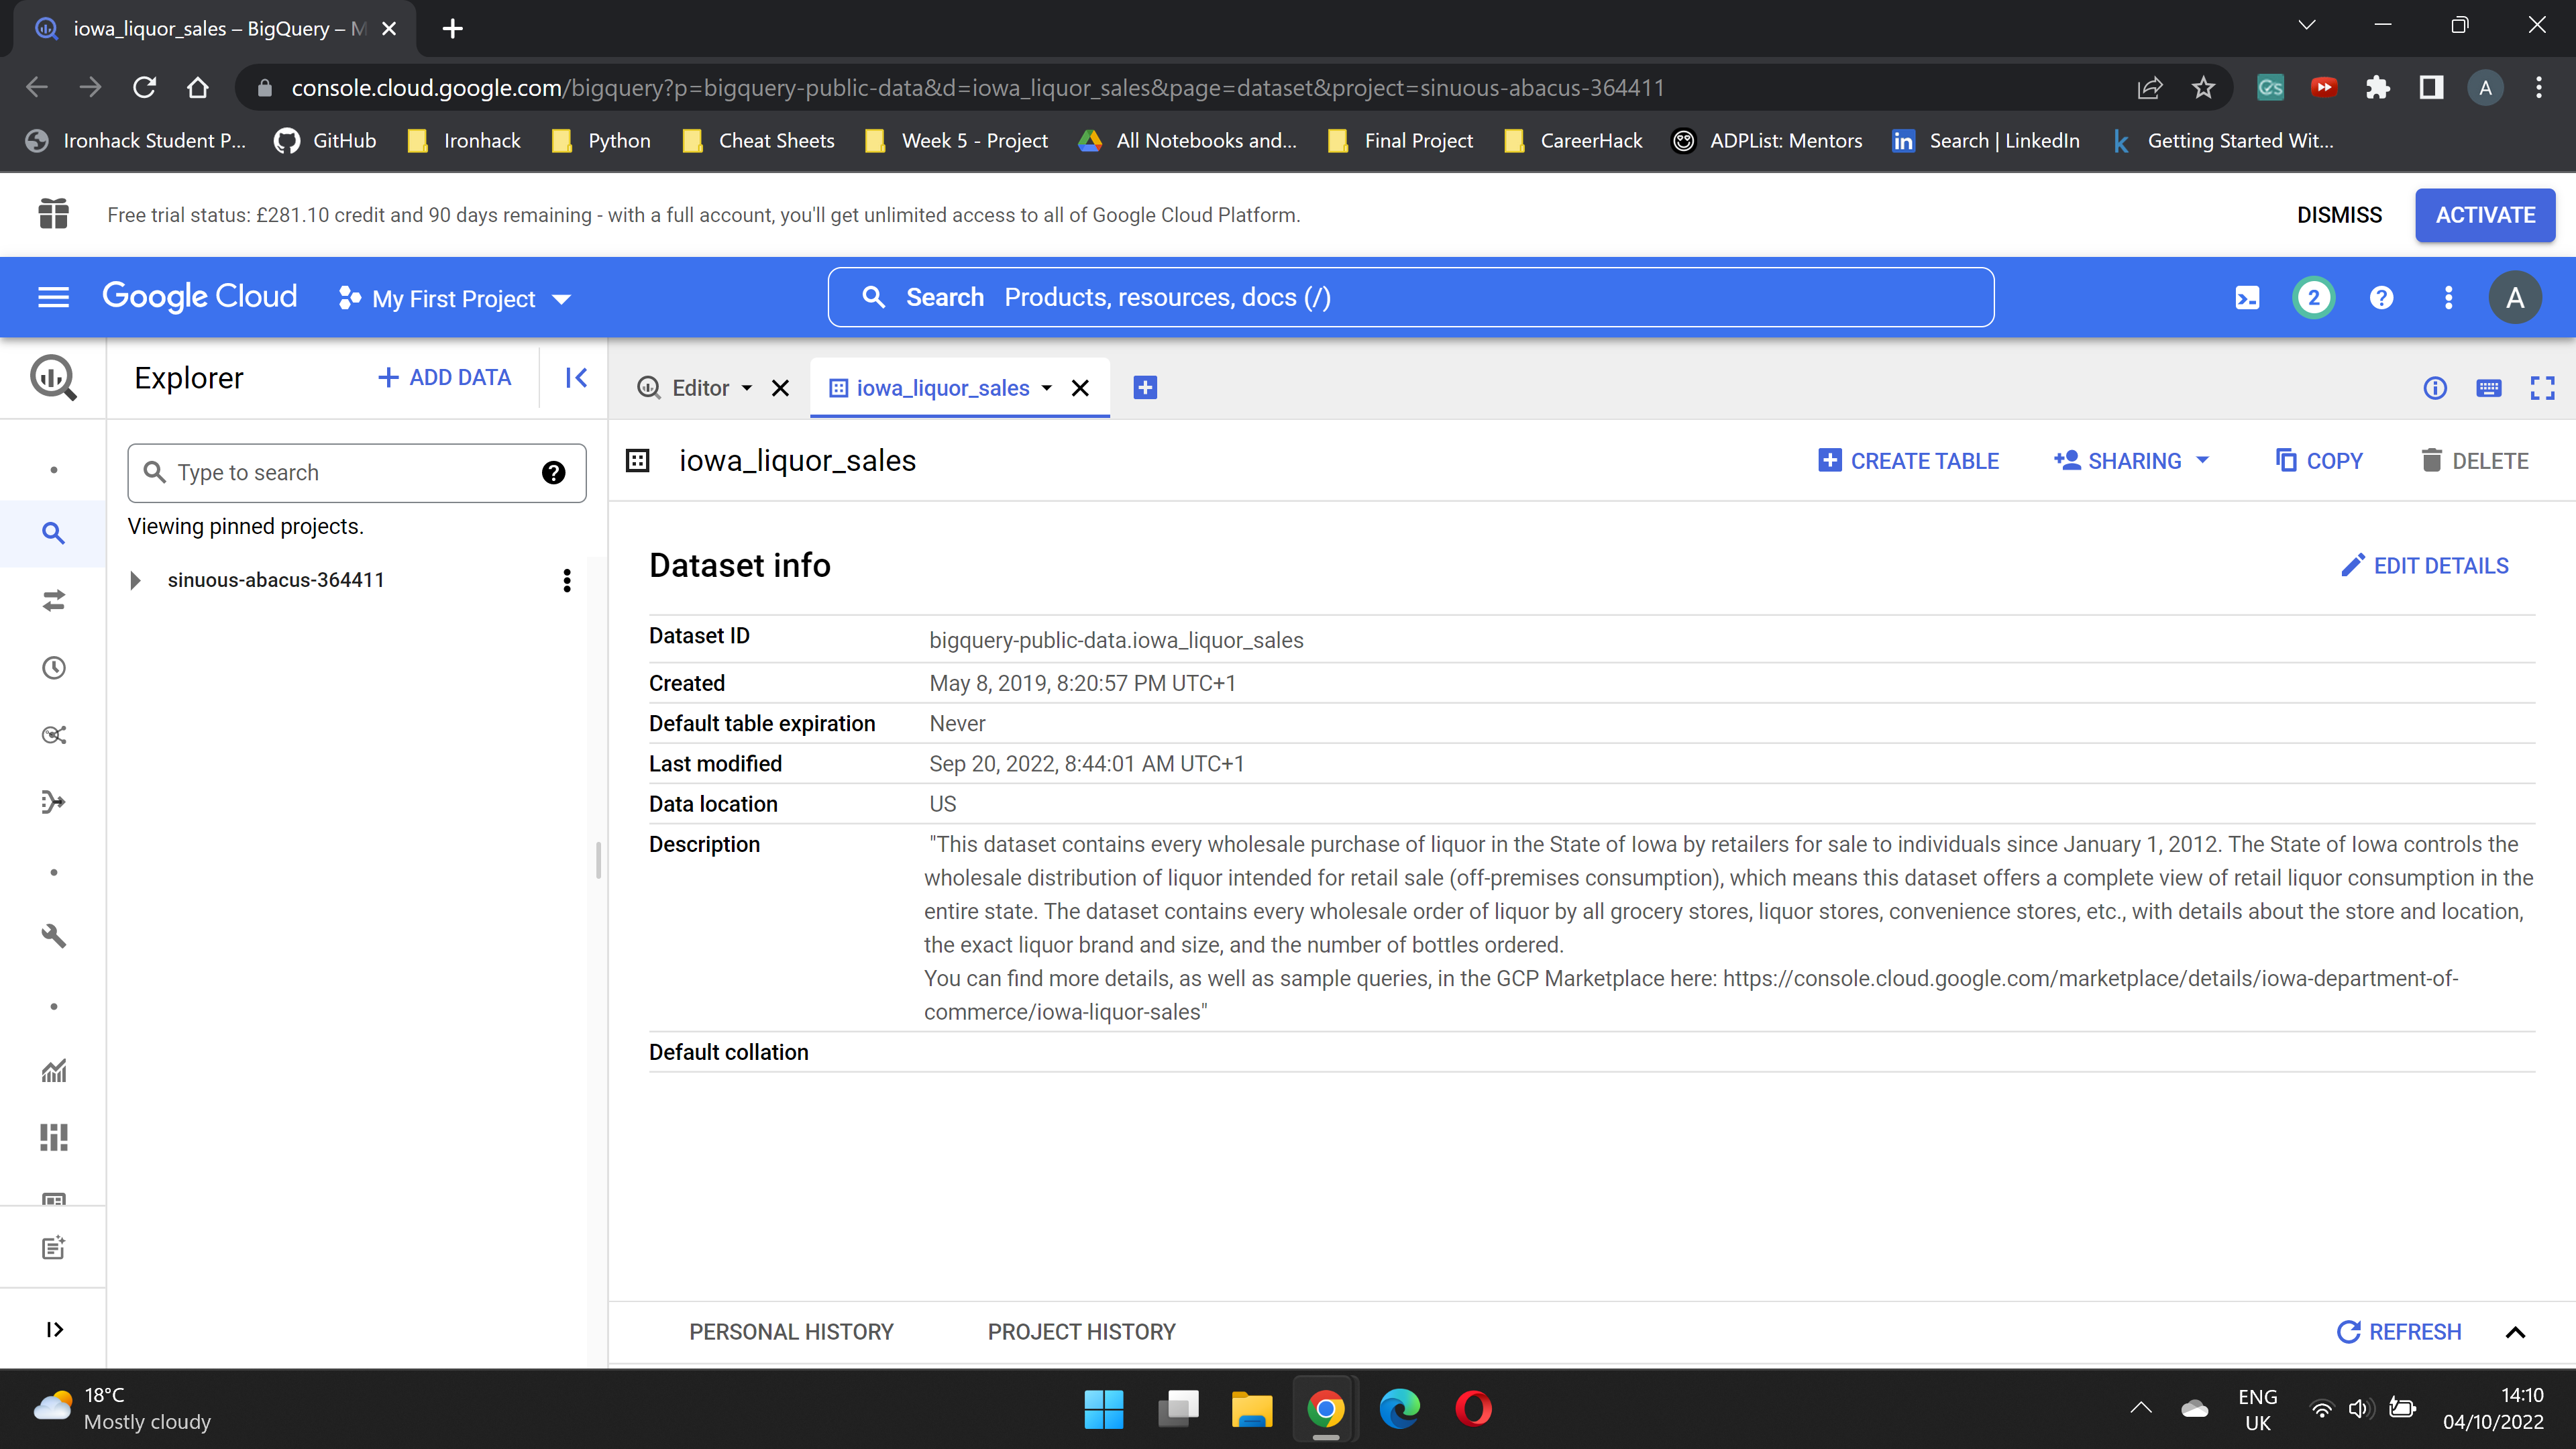

In [3]:
#Fetching the dataset using the project and datasetID - API request
dataset = client.get_dataset('bigquery-public-data.iowa_liquor_sales')

### Exploring the dataset

What is a dataset? It's just a collection of tables and tables are made up of columns and rows. 

We will use the **LIST_TABLES()** method to list all the tables in the dataset.

In [4]:
# List all the tables in the dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:
    print("{}.{}.{}".format(table.project, table.dataset_id, table.table_id))

bigquery-public-data.iowa_liquor_sales.sales


We now have the project, datasetID and tableID - **BIGQUERY-PUBLIC-DATA.IOWA_LIQUOR_SALES.SALES**

We can fetch the full table in the dataset seen below:

In [5]:
## API request to get the sales table
table = client.get_table("bigquery-public-data.iowa_liquor_sales.sales")

So far we have done the following:

**1. Created a connection to Google BigQuery**  
**2. Fetched a dataset from the bigquery public data**  
**3. Fetched the tables within the dataset**  

### Table Schema

The structure of a table is called its **SCHEMA**. We need to understand this structure so we can extract the data we need.  
We will investigate the table that we fetched above.

In [6]:
# Print information on all the columns in the sales table
table.schema

[SchemaField('invoice_and_item_number', 'STRING', 'NULLABLE', 'Concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order.', (), None),
 SchemaField('date', 'DATE', 'NULLABLE', 'Date of order', (), None),
 SchemaField('store_number', 'STRING', 'NULLABLE', 'Unique number assigned to the store who ordered the liquor.', (), None),
 SchemaField('store_name', 'STRING', 'NULLABLE', 'Name of store who ordered the liquor.', (), None),
 SchemaField('address', 'STRING', 'NULLABLE', 'Address of store who ordered the liquor.', (), None),
 SchemaField('city', 'STRING', 'NULLABLE', 'City where the store who ordered the liquor is located', (), None),
 SchemaField('zip_code', 'STRING', 'NULLABLE', 'Zip code where the store who ordered the liquor is located', (), None),
 SchemaField('store_location', 'GEOGRAPHY', 'NULLABLE', 'Location of store who ordered the liquor. The Address, City, State and

### Breakdown of Schema

Each [**SCHEMAFIELD**](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.schema.SchemaField.html) tells us about a specific field also known as column.

The **name** of the field/column.  
The **field type** of the column (STRING -> data type).      
The **mode** of the column ('NULLABLE' -> a column that allows NULL values).    
A **description** of the data in the field/column.    

We have 24 columns below:

• invoice_and_item_number  
• date  
• store_number   
• store_name  
• address  
• city  
• zip_code  
• store_location  
• county_number  
• county  
• category  
• category_name  
• vendor_number  
• vendor_name  
• item_number  
• item_description  
• pack  
• bottle_volume_ml  
• state_bottle_cost  
• state_bottle_retail  
• bottles_sold  
• sale_dollars  
• volume_sold_liters  
• volume_sold_gallons  

### Converting table to DataFrame

We can use the **LIST_ROWS()** method to read the first 10 lines of of the table.  
This returns a BigQuery [**RowIterator**](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.table.RowIterator.html) object that can be converted into a DataFrame using the **TO_DATAFRAME()** method.

In [7]:
# Read the first 10 rows and convert them into DataFrame and store as "data"
data = client.list_rows(table, max_results=10).to_dataframe()
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-35840200027,2021-04-15,4659,CASEY'S GENERAL STORE #2802 / CONRAD,409 E CENTER,CONRAD,50621.0,POINT(-92.868874 42.224536),38,GRUNDY,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
1,INV-30364300147,2020-09-18,2551,HY-VEE FOOD STORE / CHARITON,2001 WEST COURT,CHARITON,50049.0,None,59,LUCAS,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
2,INV-23049900161,2019-11-05,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,3301 GORDON DR,SIOUX CITY,51105,POINT(-96.364108 42.487752),97,WOODBURY,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
3,INV-23200700046,2019-11-13,2701,HY-VEE FAST AND FRESH / STORM LAKE,1260 LAKE AVE N,STORM LAKE,50588,POINT(-95.200757 42.653759),11,BUENA VIST,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
4,INV-26011400004,2020-03-20,4384,KUM & GO #2093 / ADEL,409 NILE KINNICK DR,ADEL,50003.0,POINT(-94.017511 41.614114),25,DALLAS,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
5,INV-24229900025,2019-12-28,5358,KUM & GO #1056/ BEVINGTON,101 E IA HWY 92,BEVINGTON,50033.0,POINT(-93.790419 41.360431),91,WARREN,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
6,INV-26530800074,2020-04-14,5444,MARSHALL BEER WINE SPIRITS,11 N 3RD AVE,MARSHALLTOWN,50158.0,POINT(-92.908013 42.050021),64,MARSHALL,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
7,INV-22004000024,2019-09-18,5635,"BREW, GAS, COFFEE, SPIRIT, CIGARATTE",404 11TH ST,CORRECTIONVILLE,51016,POINT(-95.785271 42.482223),97,WOODBURY,...,65259,JAGERMEISTER MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
8,INV-50713800088,2022-08-26,6163,CASEY'S GENERAL STORE #6116 / COUNCIL BLUFFS,15 N 16TH ST,COUNCIL BLUFFS,51501,POINT(-95.867464 41.262352),None,POTTAWATTA,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,5.63,8.45,1,8.45,0.02,0.0
9,INV-48035400027,2022-06-04,4873,CASEY'S GENERAL STORE #2559 / GRANGER,"1802, SYCAMORE ST",GRANGER,50109,POINT(-93.824366 41.758781),25,DALLAS,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,5.63,8.45,1,8.45,0.02,0.0


We can also look at specific columns within the DataFrame using the **LIST_ROWS()** method

In [8]:
# Read the first 10 rows for the first two columns (Index 0 to 2) and convert into DataFrame and store as 'first_10'
first_10 = client.list_rows(table, selected_fields=table.schema[0:2], max_results=10).to_dataframe()
first_10

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  


,invoice_and_item_number,date
0,INV-35840200027,2021-04-15
1,INV-30364300147,2020-09-18
2,INV-23049900161,2019-11-05
3,INV-23200700046,2019-11-13
4,INV-26011400004,2020-03-20
5,INV-24229900025,2019-12-28
6,INV-26530800074,2020-04-14
7,INV-22004000024,2019-09-18
8,INV-50713800088,2022-08-26
9,INV-48035400027,2022-06-04


# Select, From & Where

First lets read our dataframe that was stored as 'data' from above. 

In [9]:
data

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-35840200027,2021-04-15,4659,CASEY'S GENERAL STORE #2802 / CONRAD,409 E CENTER,CONRAD,50621.0,POINT(-92.868874 42.224536),38,GRUNDY,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
1,INV-30364300147,2020-09-18,2551,HY-VEE FOOD STORE / CHARITON,2001 WEST COURT,CHARITON,50049.0,None,59,LUCAS,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
2,INV-23049900161,2019-11-05,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,3301 GORDON DR,SIOUX CITY,51105,POINT(-96.364108 42.487752),97,WOODBURY,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
3,INV-23200700046,2019-11-13,2701,HY-VEE FAST AND FRESH / STORM LAKE,1260 LAKE AVE N,STORM LAKE,50588,POINT(-95.200757 42.653759),11,BUENA VIST,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
4,INV-26011400004,2020-03-20,4384,KUM & GO #2093 / ADEL,409 NILE KINNICK DR,ADEL,50003.0,POINT(-94.017511 41.614114),25,DALLAS,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
5,INV-24229900025,2019-12-28,5358,KUM & GO #1056/ BEVINGTON,101 E IA HWY 92,BEVINGTON,50033.0,POINT(-93.790419 41.360431),91,WARREN,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
6,INV-26530800074,2020-04-14,5444,MARSHALL BEER WINE SPIRITS,11 N 3RD AVE,MARSHALLTOWN,50158.0,POINT(-92.908013 42.050021),64,MARSHALL,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
7,INV-22004000024,2019-09-18,5635,"BREW, GAS, COFFEE, SPIRIT, CIGARATTE",404 11TH ST,CORRECTIONVILLE,51016,POINT(-95.785271 42.482223),97,WOODBURY,...,65259,JAGERMEISTER MINI MEISTERS,12,20,4.93,7.40,1,7.40,0.02,0.0
8,INV-50713800088,2022-08-26,6163,CASEY'S GENERAL STORE #6116 / COUNCIL BLUFFS,15 N 16TH ST,COUNCIL BLUFFS,51501,POINT(-95.867464 41.262352),None,POTTAWATTA,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,5.63,8.45,1,8.45,0.02,0.0
9,INV-48035400027,2022-06-04,4873,CASEY'S GENERAL STORE #2559 / GRANGER,"1802, SYCAMORE ST",GRANGER,50109,POINT(-93.824366 41.758781),25,DALLAS,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,5.63,8.45,1,8.45,0.02,0.0


The most basic **SQL** query selects a single column from a single table.

1. Specify the column you want after the word **SELECT**
2. Specify the table after the word **FROM**
3. Return only the rows meeting specific conditions using the **WHERE** clause

Please note: BigQuery datasets are **LARGE** it's advised to add a **WHERE** clause to narrow down results. 

Next, we will put together a query to to select all the values from the **city** column that are in rows where the **county** column is 'WOODBURY'.

In [10]:
#Query to select all the items from the 'CITY' column where the 'COUNTY' column is 'WOODBURY'

query = """
        SELECT city
        FROM `bigquery-public-data.iowa_liquor_sales.sales`
        WHERE county = 'WOODBURY'
        """

#Please note: """ is used to start and end a query in Python. 

### Submitting the query to the dataset

Lets use this query to get information from the **iowa_liquor_sales** dataset.  First lets create a Client object.

In [11]:
# Create a "Client" object
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


Lets set up the query with the **QUERY()** method. We run the method with the default parameters.

In [12]:
# Set up the query
query_job = client.query(query)

Next, we run the query and convert the results into a **DataFrame**.

In [13]:
# API request - run the query, return a DataFrame and store as 'query_results'
query_results = query_job.to_dataframe()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


Instead of reading the entire DataFrame, we count the unique cities as seen below:

In [14]:
#Use the value_counts method to count all the rows for each city
query_results.city.value_counts()

SIOUX CITY         718428
SERGEANT BLUFF      34729
SLOAN               10172
ANTHON               8274
CORRECTIONVILLE      5324
MOVILLE              1291
Name: city, dtype: int64

### More queries



You can select all columns with an asterisk(*) like this:

In [15]:
#If you want specific columns, you can select them with a comma in between the names.

query2 = """
        SELECT city, county
        FROM `bigquery-public-data.iowa_liquor_sales.sales`
        WHERE county = 'WOODBURY'
        """

query_job2 = client.query(query2)

query_results2 = query_job2.to_dataframe()

query_results2.value_counts()

city             county  
SIOUX CITY       WOODBURY    718428
SERGEANT BLUFF   WOODBURY     34729
SLOAN            WOODBURY     10172
ANTHON           WOODBURY      8274
CORRECTIONVILLE  WOODBURY      5324
MOVILLE          WOODBURY      1291
dtype: int64

In [16]:
#If you want all columns, you can select them with asterisk(*).

query3 = """
        SELECT*
        FROM `bigquery-public-data.iowa_liquor_sales.sales`
        WHERE county = 'WOODBURY'
        LIMIT 5
        """

query_job3 = client.query(query3)

query_results3 = query_job3.to_dataframe()

query_results3

#Please note: The LIMIT clause is added to specify the number of records to return this is useful if the table is large. 
#Here its better to view results in a DataFrame.

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-28890400005,2020-07-21,4884,TOBACCO HUT #11 / SIOUX CITY,"4523, MORNINGSIDE AVE",SIOUX CITY,51106.0,POINT(-96.348659 42.470479),97,WOODBURY,...,10550,BLACK VELVET TOASTED CARAMEL,12,750,6.75,10.13,24,243.12,18.0,4.75
1,INV-26101900029,2020-03-24,4200,FAREWAY STORES #019 / SIOUX CITY,4016 INDIAN HILLS DR,SIOUX CITY,51108.0,POINT(-96.373252 42.538578),97,WOODBURY,...,10791,CROWN ROYAL VANILLA,12,750,15.59,23.39,24,561.36,18.0,4.75
2,INV-42758700160,2021-12-09,2594,HY-VEE FOOD STORE / SIOUX CITY,4500 SERGEANT ROAD,SIOUX CITY,51106.0,POINT(-96.346969 42.447396),97,WOODBURY,...,10791,CROWN ROYAL VANILLA,12,750,16.59,24.89,24,597.36,18.0,4.75
3,INV-45994900045,2022-03-29,5351,DOWNTOWN LIQUOR,1203 5TH ST.,SIOUX CITY,51101.0,POINT(-96.394671 42.495324),97,WOODBURY,...,10807,CROWN ROYAL REGAL APPLE,12,750,17.49,26.24,24,597.36,18.0,4.75
4,INV-23654600021,2019-12-03,5344,CASEY'S GENERAL STORE # 2607/ SIOUX CITY,3731 HAMILTON BLVD.,SIOUX CITY,51104.0,POINT(-96.408455 42.53511),97,WOODBURY,...,10807,CROWN ROYAL REGAL APPLE,12,750,15.59,23.39,24,561.36,18.0,4.75


### Working with big datasets

BigQuery datasets can be huge. Each Kaggle user can scan 5TB every 30 days for free. Once you hit that limit, you'll have to wait for it to reset.

You can estimate the size of any query before running it. Here is an example using the IOWA dataset. To see how much data a query will scan, we create a QueryJobConfig object and set the dry_run parameter to True.

In [17]:
# Query to get the store_number, item description for every row where the city is "SIOUX CITY". 

query4 = """
        SELECT store_number, item_description
        FROM `bigquery-public-data.iowa_liquor_sales.sales`
        WHERE city = "SIOUX CITY"
"""

# Create a QueryJobConfig object to estimate size of query without running it
dry_run = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query4, job_config=dry_run)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 1006093029 bytes.


We can specify a parameter when running the query to limit how much data you are willing to scan.

In [18]:
# Only run the query if it's < 1 MB
ONE_MB = 1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)

# Set up the query (will only run if it's < 1 MB)
safe_query_job = client.query(query4, job_config=safe_config)

# API request - try to run the query and return a DataFrame
safe_query_job.to_dataframe()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,store_number,item_description
0,5344,BLACK VELVET
1,5344,HAWKEYE VODKA
2,4975,HAWKEYE VODKA
3,6210,MCCORMICK 80PRF VODKA PET
4,5630,CAPTAIN MORGAN ORIGINAL SPICED
...,...,...
722160,5800,FIVE STAR
722161,5800,HAWKEYE VODKA
722162,5800,TITOS HANDMADE VODKA
722163,5800,ADMIRAL NELSON SPICED


The following error message can be seen above:

InternalServerError: 500 Query exceeded limit for bytes billed: 1000000. 1006632960 or higher required.

We can increase the limit to run this query successfully. 

In [19]:
# Only run the query if it's < 2 GB
ONE_GB = 1000*1000*2000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's < 2 GB)
safe_query_job = client.query(query4, job_config=safe_config)

# API request - try to run the query, and return a DataFrame
query_results4 = safe_query_job.to_dataframe()

#Display first 5 results
query_results4.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,store_number,item_description
0,5344,BLACK VELVET
1,5344,HAWKEYE VODKA
2,4975,HAWKEYE VODKA
3,6210,MCCORMICK 80PRF VODKA PET
4,5630,CAPTAIN MORGAN ORIGINAL SPICED
